In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
import yfinance as yf
sns.set()

In [2]:
tickers=['^NSEBANK','^NSEI']
data = pd.DataFrame()
for ticker in tickers:
    data[ticker]=yf.download(ticker,start='2010-01-01',end='2025-7-7')['Close']

C:\Users\swana\AppData\Local\Temp\ipykernel_19972\690378777.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker]=yf.download(ticker,start='2010-01-01',end='2025-7-7')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\swana\AppData\Local\Temp\ipykernel_19972\690378777.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker]=yf.download(ticker,start='2010-01-01',end='2025-7-7')['Close']
[*********************100%***********************]  1 of 1 completed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3532 entries, 2010-01-04 to 2025-07-04
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ^NSEBANK  3532 non-null   float64
 1   ^NSEI     3530 non-null   float64
dtypes: float64(2)
memory usage: 82.8 KB


In [4]:
data.head()

,^NSEBANK,^NSEI
Date,,
2010-01-04,9112.244141,5232.200195
2010-01-05,9192.043945,5277.899902
2010-01-06,9222.892578,5281.799805
2010-01-07,9192.843750,5263.100098
2010-01-08,9160.593750,5244.750000


In [5]:
data.isna().sum()

^NSEBANK    0
^NSEI       2
dtype: int64

In [6]:
## Dropping Null Values
data.dropna(inplace=True)

In [7]:
data.isna().sum()

^NSEBANK    0
^NSEI       0
dtype: int64

In [8]:
df=data.copy()

In [9]:
df.head()

,^NSEBANK,^NSEI
Date,,
2010-01-04,9112.244141,5232.200195
2010-01-05,9192.043945,5277.899902
2010-01-06,9222.892578,5281.799805
2010-01-07,9192.843750,5263.100098
2010-01-08,9160.593750,5244.750000


In [10]:
df=df.asfreq('B')

In [11]:
df.head()

,^NSEBANK,^NSEI
Date,,
2010-01-04,9112.244141,5232.200195
2010-01-05,9192.043945,5277.899902
2010-01-06,9222.892578,5281.799805
2010-01-07,9192.843750,5263.100098
2010-01-08,9160.593750,5244.750000


In [12]:
df.isna().sum()

^NSEBANK    515
^NSEI       515
dtype: int64

In [13]:
df.fillna(method='ffill',inplace=True)

C:\Users\swana\AppData\Local\Temp\ipykernel_19972\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [14]:
df.isna().sum()

^NSEBANK    0
^NSEI       0
dtype: int64

In [15]:
## Simplyfying the Datasets
df['Market_value']=df['^NSEBANK']

In [16]:
df.head()

,^NSEBANK,^NSEI,Market_value
Date,,,
2010-01-04,9112.244141,5232.200195,9112.244141
2010-01-05,9192.043945,5277.899902,9192.043945
2010-01-06,9222.892578,5281.799805,9222.892578
2010-01-07,9192.843750,5263.100098,9192.843750
2010-01-08,9160.593750,5244.750000,9160.593750


In [17]:
## Deleting Extra Columns 
del df['^NSEBANK'],df['^NSEI']

In [18]:
df.head()

,Market_value
Date,
2010-01-04,9112.244141
2010-01-05,9192.043945
2010-01-06,9222.892578
2010-01-07,9192.843750
2010-01-08,9160.593750


In [19]:
df.describe()

,Market_value
count,4045.000000
mean,25076.327577
std,13321.497160
min,7798.458984
25%,12424.555664
50%,22264.642578
75%,35123.988281
max,57459.449219


In [20]:
## Spliting the Date
size=int(len(df)*0.8)
train=df.iloc[:size]
test=df.iloc[size:]

In [21]:
train.tail()

,Market_value
Date,
2022-05-24,34289.750000
2022-05-25,34339.101562
2022-05-26,35094.492188
2022-05-27,35612.886719
2022-05-30,35826.531250


In [22]:
test.head()

,Market_value
Date,
2022-05-31,35486.984375
2022-06-01,35620.386719
2022-06-02,35613.234375
2022-06-03,35274.640625
2022-06-06,35309.789062


## Calculating White Noise values

In [23]:
wn=np.random.normal(loc=df['Market_value'].mean(),scale=df['Market_value'].std(),size=len(df))

In [24]:
df['wn']=wn

In [25]:
df.head()

,Market_value,wn
Date,,
2010-01-04,9112.244141,34751.647117
2010-01-05,9192.043945,20578.364643
2010-01-06,9222.892578,31528.117213
2010-01-07,9192.843750,37158.245830
2010-01-08,9160.593750,37307.564084


Text(0.5, 1.0, 'White Noise')

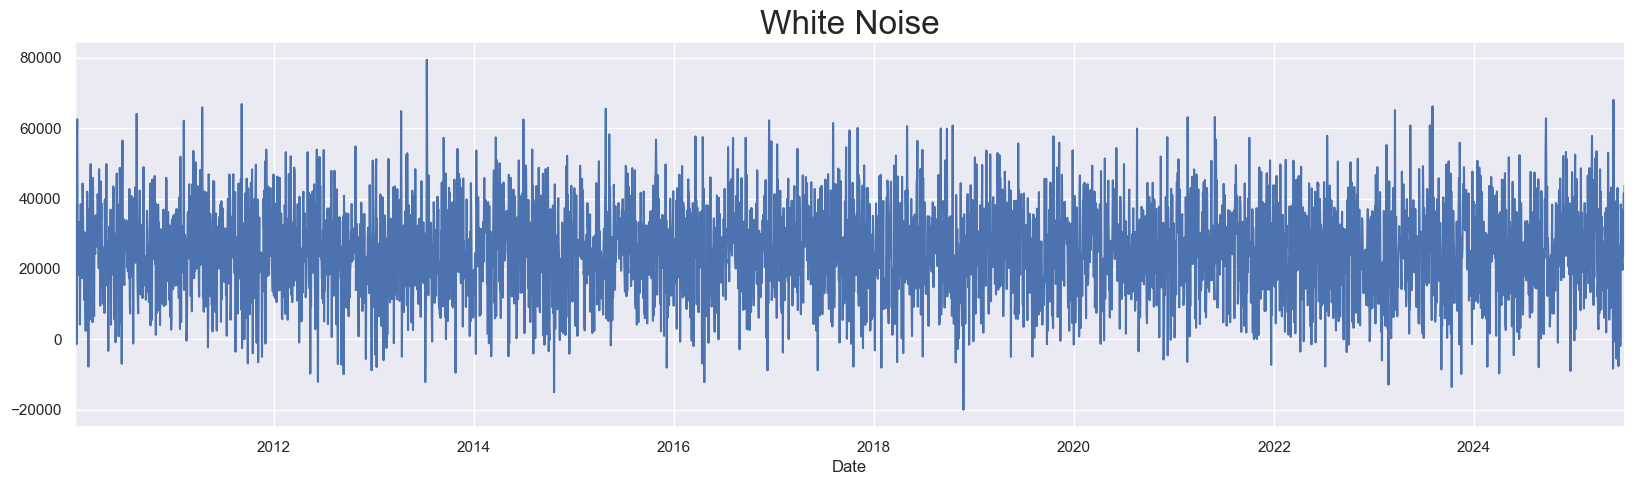

In [26]:
df['wn'].plot(figsize=(20,5))
plt.title('White Noise',size=24)

Text(0.5, 1.0, 'Bank Nifty')

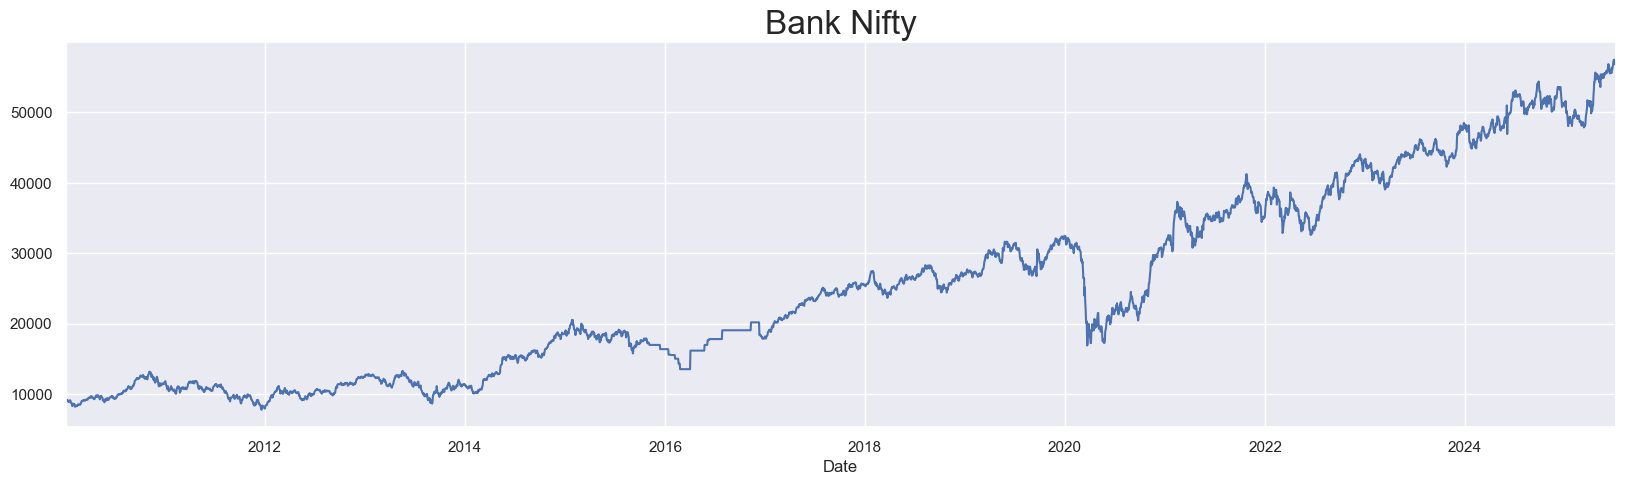

In [27]:
df.Market_value.plot(figsize=(20,5))
plt.title('Bank Nifty',size=24)

## Random Walk Time Series analysis

In [28]:
## Calculating Returns
diffs=df.Market_value.diff().dropna()

In [29]:
mean=diffs.mean()
std=diffs.std()

In [30]:
n_steps = len(diffs)
random_steps = np.random.normal(loc=mean, scale=std, size=n_steps)

In [31]:
# Build random walk
rw = df['Market_value'].iloc[0] + np.cumsum(random_steps)
df=df[1:]

In [32]:
df['rw']=rw

In [33]:
df.head()

,Market_value,wn,rw
Date,,,
2010-01-05,9192.043945,20578.364643,9161.481831
2010-01-06,9222.892578,31528.117213,9210.855735
2010-01-07,9192.843750,37158.245830,9560.562381
2010-01-08,9160.593750,37307.564084,9661.037821
2010-01-11,9173.443359,-1406.583205,9462.214448


Text(0.5, 1.0, 'Random Walk')

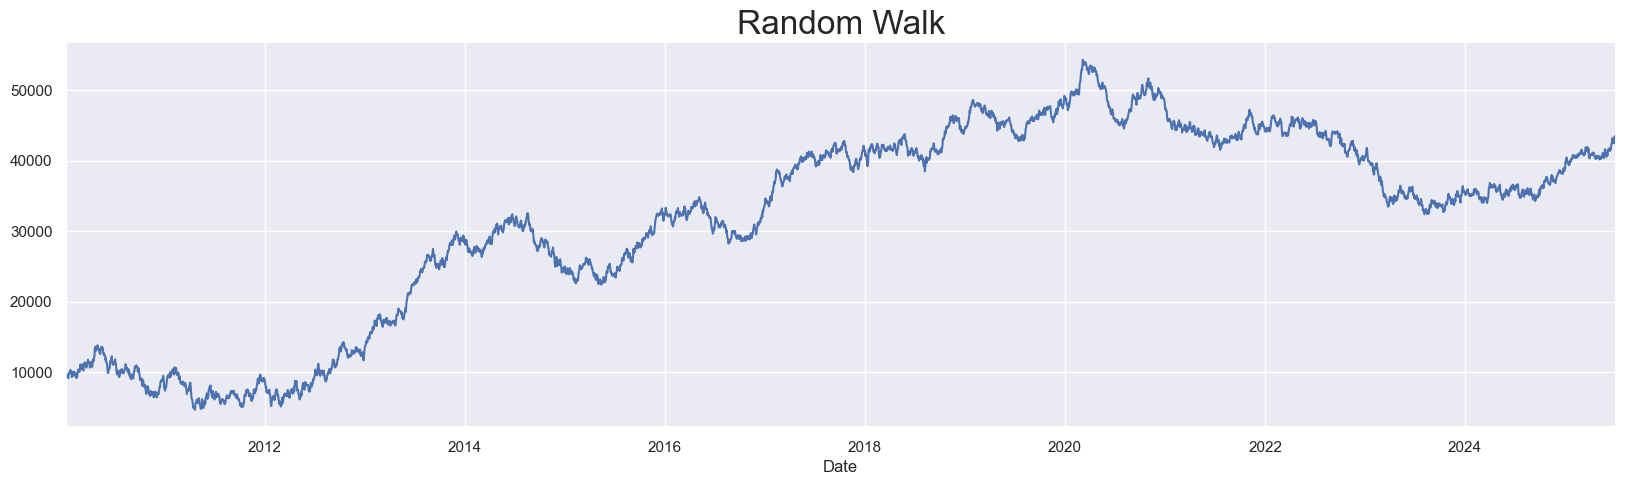

In [34]:
df.rw.plot(figsize=(20,5))
plt.title('Random Walk',size=24)

Text(0.5, 1.0, 'Random Walk(Prediction) vs Bank Nifty')

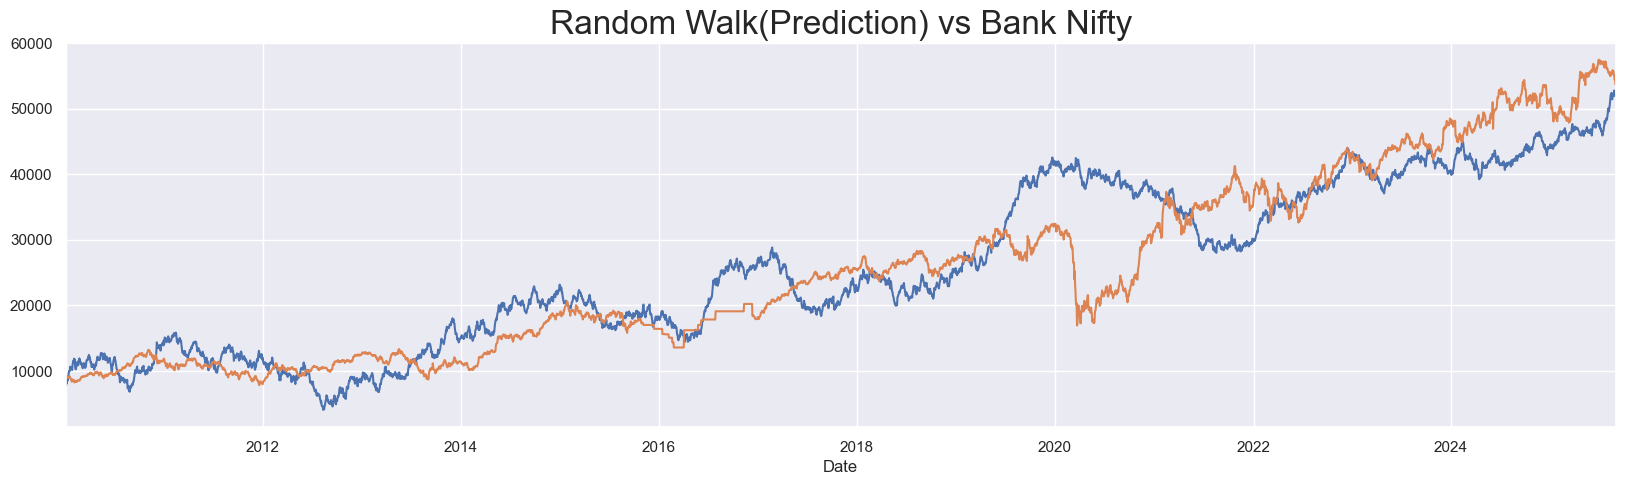

In [38]:
df.rw.plot(figsize=(20,5))
df.Market_value.plot(figsize=(20,5))
plt.title('Random Walk(Prediction) vs Bank Nifty',size=24)

## ploting ACF anf PACF plots

Text(0.5, 1.0, 'ACF Bank Nifty')

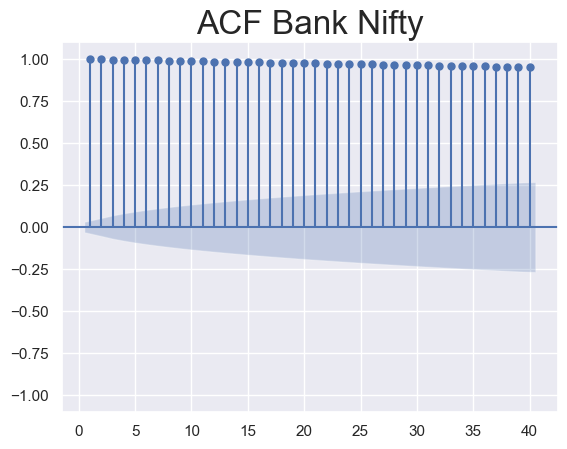

In [ ]:
## ACF
sgt.plot_acf(df.Market_value,lags=40,zero=False)
plt.ylim(-1.1,1.1)
plt.title("ACF Bank Nifty",size=24)

Text(0.5, 1.0, 'PACF Bank Nifty')

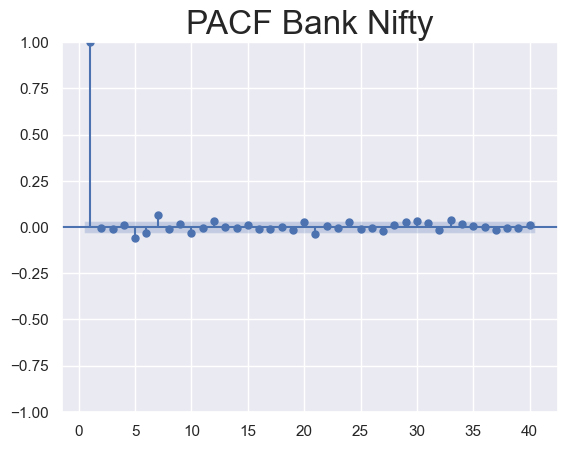

In [ ]:
## Pacf 
sgt.plot_pacf(df.Market_value,lags=40,zero=False,method=('ols'))
plt.title("PACF Bank Nifty",size=24)